# Algoritmi Avanzati, 14.05.2019
---

### EXERCISE 14

Given the iris dataset, apply PCA with $k=2$ and plot projected data.

TIP:
* at https://plot.ly/ipython-notebooks/principal-component-analysis/, you can find many tips to build the solution

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

dataset = pd.read_csv("Datasets/iris.data", names=['x1', 'x2', 'x3', 'x4', 'y'])
X = np.array(dataset.drop(['y'], axis=1))
Y = np.array(dataset['y'])
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [62]:
# Standardize the data
for col_i in range(X.shape[1]):
    col = X[:, col_i]
    X[:, col_i] = (col - col.mean()) / col.std()
    
# S: Covariance Matrix
S = X.T.dot(X) / X.shape[0]

# Eigenvals and Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(S)

# Selecting 2 principal components
comp = sorted(zip(eig_vals, eig_vecs.T), reverse=True)[:2]

# W: Projection Matrix
W = np.array([comp[0][1], comp[1][1]]).T

# Project the data
X2D = X.dot(W)

**Plot the data:**

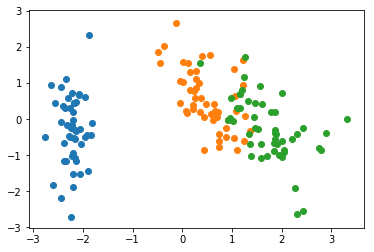

In [63]:
for label in dataset['y'].unique():
    tmp = X2D[Y == label]
    plt.scatter(tmp[:, 0], tmp[:, 1])